In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


Check Null Value

In [ ]:
df.isnull().values.sum()

0

In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_x= LabelEncoder()
df['Kyphosis'] = le_x.fit_transform(df.Kyphosis)
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [ ]:
x = df.drop(['Kyphosis'], axis = 1)


In [ ]:
y = df['Kyphosis']

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.35,random_state=7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
predictions = dtc.predict(xtest)

In [ ]:
predictions

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.43      0.50      0.46         6

    accuracy                           0.76        29
   macro avg       0.65      0.66      0.65        29
weighted avg       0.77      0.76      0.77        29



In [ ]:
print(confusion_matrix(ytest,predictions))

[[19  4]
 [ 3  3]]


In [ ]:
dtc.score(xtest,ytest)

0.7586206896551724

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
pip install six

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

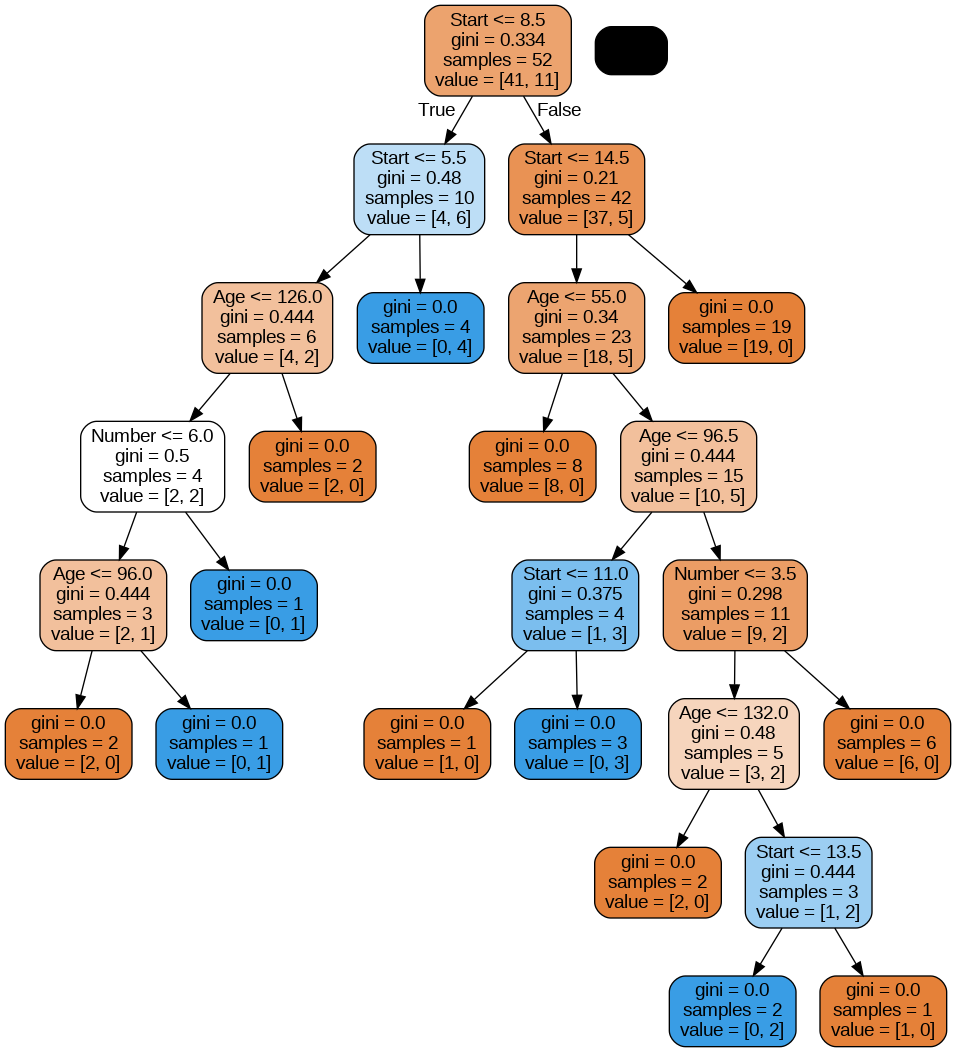

In [ ]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())